# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [91]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [115]:
# Display a description of the dataset
display(data.describe())

display(data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16705,2037,3202,10643,116,1365
1,1725,3651,12822,824,4424,2157
2,2126,3289,3281,1535,235,4365


Offset from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4705.0,-3759.0,-4749.0,7571.0,-2765.0,-160.0
1,-10275.0,-2145.0,4871.0,-2248.0,1543.0,632.0
2,-9874.0,-2507.0,-4670.0,-1537.0,-2646.0,2840.0


Offset from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8201.0,-1590.0,-1554.0,9117.0,-700.0,399.0
1,-6779.0,24.0,8066.0,-702.0,3608.0,1191.0
2,-6378.0,-338.0,-1475.0,9.0,-581.0,3399.0


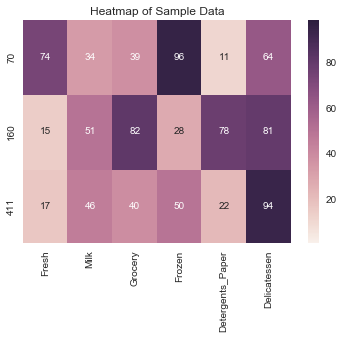

In [113]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = [146,146,144]
indices = [70,160,411]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "Offset from mean"
display(samples - np.around(data.mean().values))

print "Offset from median"
display(samples - np.around(data.median().values))

import matplotlib.pyplot as plt
import seaborn as sns

percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
ax = plt.axes()

sns.heatmap(percentiles, vmin=1, vmax=99, annot=True,ax=ax)
ax.set_title('Heatmap of Sample Data')
plt.show()

#display(samples.describe())


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**


Customer at Index 70: The sample customer at index 70 has spent very much higher than the median cost for the products which comes under ** Fresh & Frozen ** category. The customer has spent little below the median cost for the products which falls under  ** Milk, Grocery and Detergents_Paper ** category. The customer has also spent a little bit more than the median cost for the products which comes under ** Delicatessen ** category. This observation shows that this customer has purchased more quantities of Fresh, Frozen and a little more than average spent on Delicatessen products, While spending very much less than the average for products under Milk,Grocery and Detergents_Paper. This clearly shows that the customer might be a restaurant or a hotel where there is a less requirement of ready-to-make products, but the products which comes under Fresh and Frozen will be highly moving.

Customer at Index 160: This sample customer has spent very little from the median spent for the products which falls under ** Fresh, Frozen **. This customers spent of ** Milk ** is also a little bit more than the median spent on this product category. But this particular customer has spent way more than the median spent for the products which falls under 
** Grocery,Detergents_Paper and Delicatessen **. This cleary shows that this customer would be a cafe or grocery store where the products which belong to the categories of ** Grocery,Detergents_Paper and Delicatessen ** will be highly moving when compared to Fresh and Frozen products.

Customer at Index 411: This customer has spent very much less than the average spent on the products which comes under         ** Fresh,Milk,Grocery and Detergents_Paper **. This customer has spend very much higher than the average spent for the prodcuts of ** Delicatessen ** category and around the median spent for the products which falls under ** Frozen ** category. This shows that the customer might a small restaurant or cafe establishment where the spending on ready to make food products will be much higher and descent amount of Frozen foods. This customer is similar to the first sample customer.

These sample customers data clearly shows that the dataset is skewed because the mean for each product category is very much higher than the median of those product categories.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [123]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
target_col = 'Detergents_Paper'
target_data = data[target_col]
new_data = data.drop([target_col], axis = 1)

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,target_data,test_size=0.25,random_state=35)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=35).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print score

# Detergents_Paper = 0.80
# Fresh = -0.62
# Milk = 0.021
# Grocery = 0.83
# Frozen = -8.57
# Delicatessen = -0.33

0.800186641531


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

At first I tried to predict the "Detergents_Paper", because I thought it was kind of the odd one out of the rest of the product categories feature set. The score I came up with was 0.80, which seems like it could be pretty easy to predict, but I wasn't sure how that stacked up to the other features. To find out I extracted each one in turn and found the following scores:

Detergents = 0.80
Frozen = -8.57
Fresh = -0.62
Milk = 0.021
Grocery = 0.83
Delicatessen = -0.33

Based on this it seems that Detergents and Grocery are the least necesary for identifying spending habits, as they are the easiest to predict from the balance of the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

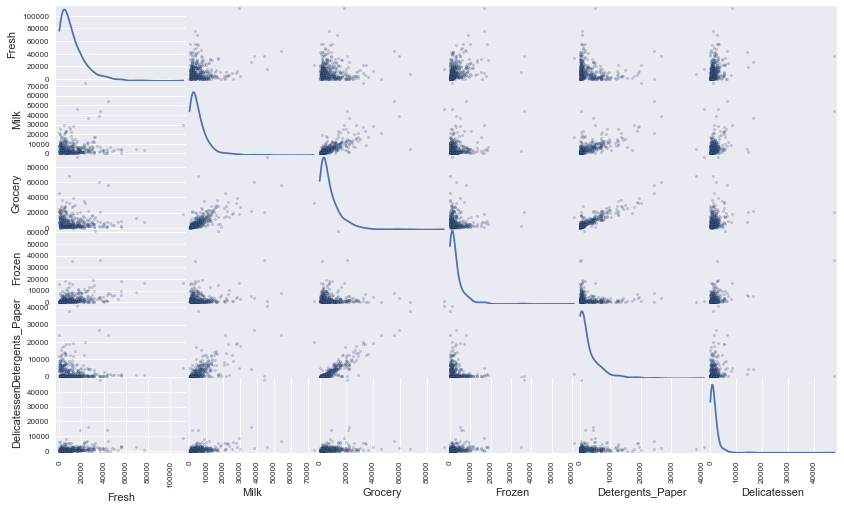

In [124]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

From the visualization above, we can assume that Grocery and Detergents_Paper are moderately correlated with one another. Yes, this confirm to my suspicion that these two feature product categories can be reasonably predicted when comparing to other product categories. Milk product feature category is also mildly correlated with Grocery and Detergents_Paper. The data for all the product category features are skewed positively. All the categories have more data points close to zero with respect to some of the higher data points, but since there are so few we could instead assume that there are a good amount of outliers.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

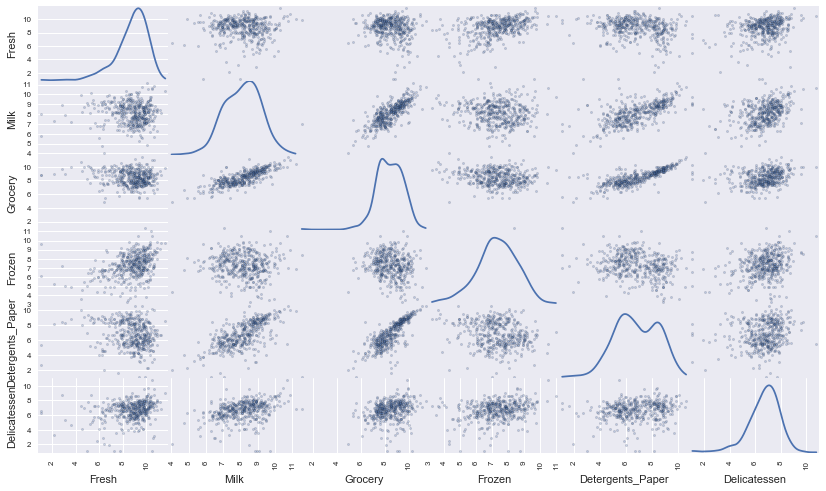

In [125]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [126]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.723463,7.619233,8.071531,9.272658,4.753590,7.218910
1,7.452982,8.202756,9.458918,6.714171,8.394800,7.676474
2,7.661998,8.098339,8.095904,7.336286,5.459586,8.381373


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [127]:
outlier_data_points = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_data_points = np.append(outlier_data_points, outlier_data.index.values.astype('int64'))
    
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outlier_data)

# ensure sample doesn't contain any outliers
outlier_data_points, indices = np.unique(outlier_data_points, return_inverse=True)
counts = np.bincount(indices)

# OPTIONAL: Select the indices for data points you wish to remove
outliers = outlier_data_points[counts>1]
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print outliers

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are several data points which are outliers for more than one feature [65, 66, 75, 128, 154]. I believe they should be removed because they represent truly unusual points with respect to the rest of the data, and therefore will be of little use in forming clusters of similar customers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

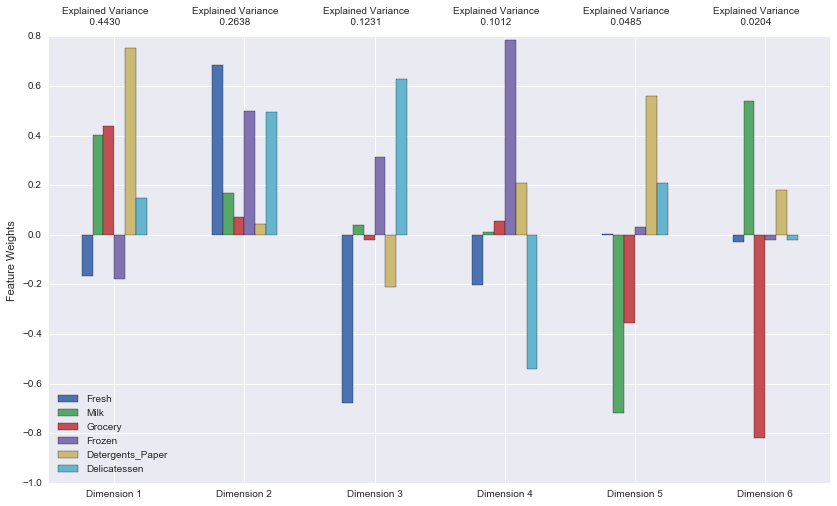

In [128]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results['Explained Variance'].cumsum())

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first principal component explains a variance of 44.3% and the second pricipal component explains a variance of 26.4%.

Together the first 2 account for 70.7% of all variance in the data.After including the 3rd and 4th principal component (12.3% and 10.1% respectively) we've now accounted for 93.1%. It looks like the first principal component relies heavily on  the spending habits on the product categories of Detergents, Grocery, and Milk.This shows that these 3 product category features as we had identified above are being mostly correlated.

The second dimension appears to be orthogonal to the first, reducing the impacts of spending on the product categories of Milk, Grocery, and Detergents. This second pricipal component relies on the variation in spending habits for the prduct categories of  Fresh, Frozen, and Delicatssen items.

The third dimension shows the low spending  of Fresh product category and high Delicatessen prodcut category spending. While the 4th shows the spending habits for low Delicatessen and high Frozen product categories.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [129]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3404,1.6911,0.7155,0.5932,-0.4606,-0.4074
1,2.1425,-0.5705,0.9605,-0.3527,0.6641,-0.4568
2,-0.7424,-0.0059,2.1018,-0.9815,-0.2461,0.0371


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [130]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [131]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.3404,1.6911
1,2.1425,-0.5705
2,-0.7424,-0.0059


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

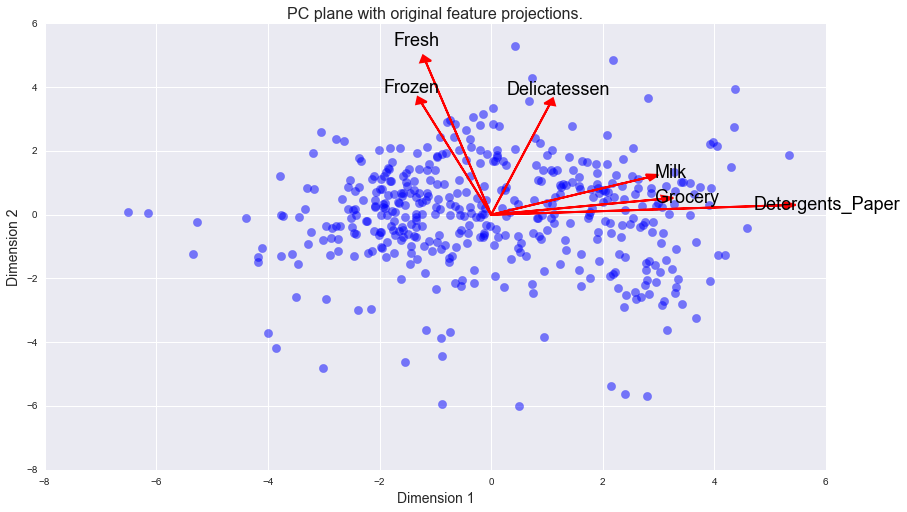

In [132]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means algorithm is aa unsupervised, non-deterministic and numerical clustering machine learning algorithm used to to cluster or group similar data points from unlabelled data set. K-means is very fast, and very easy to understand the theoretical implementation of how it works. With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small). K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.GMM overcomes some of the drawbacks of K-means (like assuming isotropic clusters) while retaining a good deal of speed.

Our observation clearly shows that there will be a very small number of cluster gropus, and hence K-means is particularly fast enough especially if the number of clusters is small, we will go with K-Means clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# TODO: Apply your clustering algorithm of choice to the reduced data
no_of_clusters = 2

clusterer = KMeans(n_clusters=no_of_clusters, random_state=35).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

print("Silhouette score :", score)

# score by number of clusters for kmeans
# 2 = 0.426
# 3 = 0.392
# 4 = 0.331
# 5 = 0.352
# 6 = 0.365
# 7 = 0.363
# 8 = 0.352
# 9 = 0.354
# 10 = 0.359

('Silhouette score :', 0.4262810154691084)


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score for different numbers of clusters has been found out and reported in the end of above code block as comment. 

I checked from 2 to 10 clusters one by one and the one which has 2 number of clusters came out with the highest score. The silhoutte score for the clustering algorithm hasn't much changed from 4 number of clusters and afterwards.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

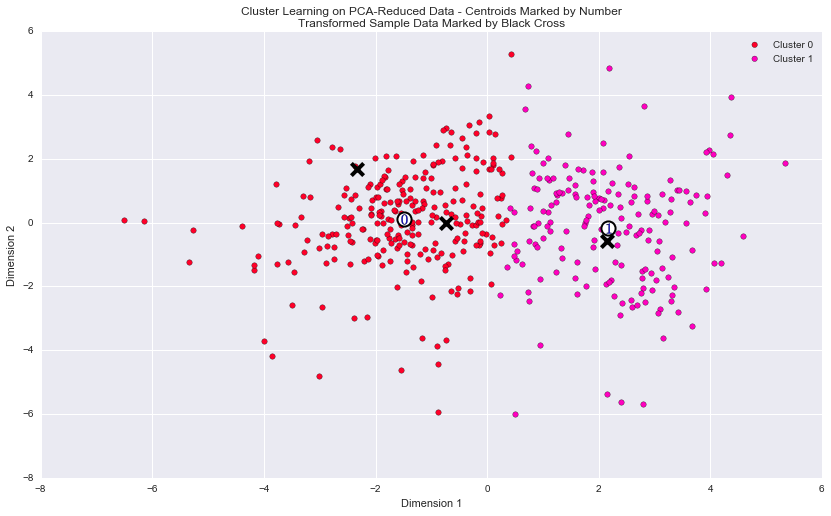

In [134]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [135]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

print "Actual cluster centers"
display(true_centers)

good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)

print "mean values"
display(np.around(good_unscaled_data.mean().values))

print "median values"
display(np.around(good_unscaled_data.median().values))

print "Centers offset from mean"
display(true_centers - np.around(good_unscaled_data.mean().values))

print "Centers offset from median"
display(true_centers - np.around(good_unscaled_data.median().values))

Actual cluster centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


mean values


array([ 12089.,   5788.,   7911.,   3096.,   2848.,   1537.])

median values


array([ 8565.,  3634.,  4757.,  1541.,   813.,   967.])

Centers offset from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3222.0,-3891.0,-5434.0,-1008.0,-2554.0,-856.0
Segment 1,-8084.0,2112.0,4193.0,-2144.0,1713.0,-501.0


Centers offset from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,302.0,-1737.0,-2280.0,547.0,-519.0,-286.0
Segment 1,-4560.0,4266.0,7347.0,-589.0,3748.0,69.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

The avove results shows us that these two segment of customers are divided between those who purchase a lot of fresh and frozen goods, but little detergents or grocery (Segment 0), and those customers which purchase lots of grocery/milk/detergents, some fresh, and some delicatssen (Segment 1).

We can confirm form the above results as that segment 0 has a high purchasing tendancy for frozen and fresh goods by looking at their relationship to the central values of the original dataset with the outliers removed, especially the median value since the mean is heavily influenced by a few very high purchasers. Segment 0 is above the median in Fresh and Frozen by several hundred units, but below the median values for the whole dataset in detergents and grocery.

Similarly, Segment 1 is thousands of units above the median for grocery, milk, and detergents, but below the median values for fresh and frozen.

Since these are clusters that sort of divide the entirety of wholesale customers in 2, I'd be inclined to make the split between those customer who sell food to consumers to prepare themselves (Segment 1: Grocery stores, supermarkets, etc), and those customers who prepare food to serve to customers (Coffee shops, restaurants, etc).


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [136]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** 

Customer at Index 70: 
I originally predicted this customer had more purchase for ** Fresh, Milk, Grocery, Frozen **, this matches the cluster it has been assigned.

Customer at Index 160: 
I thought this customer had spent most for the product categories of ** Detergents_Paper and Delicatessen ** and this matches with the results of the clustering.

Customer at Index 411: 
I predicted this customer has most of their spends for ** Fresh,Milk and Frozen ** and the results matches the cluster assignment and my prediction

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Segment 0 buys a ton of fresh food, and if they're the kind of customers I think they are they have to ride the waves of event planning which can quickly drain supplies of an in demand item for the evening (plus they'd probably rather be directing their staff to managing customers rather than tending to deliveries in the evening). 

I think, We would want to only apply the 3-day per week schedule to Segment 1 customers (retailing). With less fresh food on hand, and no major events with purchasing spikes like restaurants or hotels, they can probably sustain a less frequent delivery schedule more readily. 

We could conduct useful A/B testing of both groups by selecting a small but statistically significant sample of customers from each cluster and using the remainder of their cluster as the control group. We could apply the new 3 day schedule to just the sample for each cluster, and measure how their reported service satsifaction changes with respect to their control groups. This would give us data on how the schedule change affects customers in these 2 seperate categories, which will reveal if the schedule is more helpful/damaging to one group or the other

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The cluster that we assign them to is in itself an engineered feature, because we can consider that this customer segment best identifies the new customers which could be used as an input when predicting other labels like what sort of customer they are or how much of a given category they're likely to purchase.

It seems obvious that most of the customer can be placed into somewhere between the Segment 0 or the Segment 1 .
Once the company clarifies the traits or labels that apply to those new customers then they can provide two different types of customer service that are tailored to those customers, and improve the customer satisfaction rate as a whole.

From the results of these unsupervised learning we can label the clusters, then we can feed these labeled customer data into supervised learning method, such as classify new customers into one of the groups, or estimate the potential demand for new customers.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

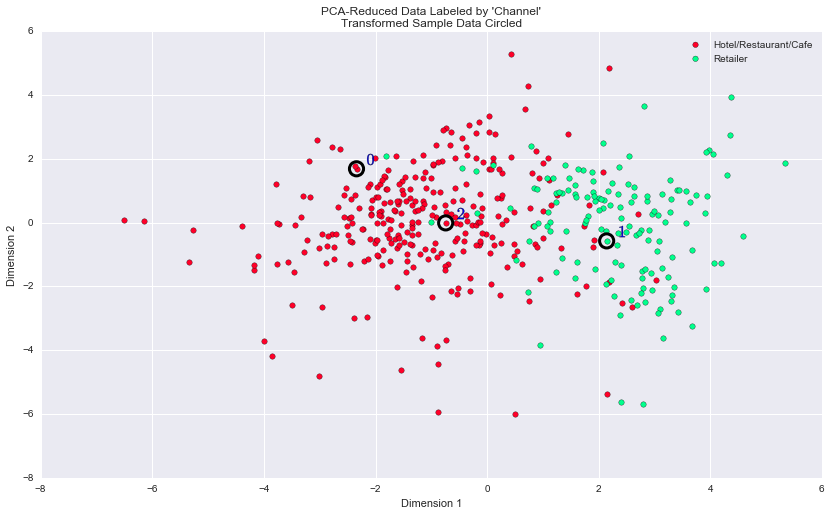

In [137]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters matches the number of channels, so it seems like that's quite relevent and maatches well.

Although there is some bleed over between the 2 groups in the middle of the distribution, segment 0 in the analysis is clearly "Hotel/Restaurants/Cafes" , and segment 1 is clearly "Retail". This reinforces the above speculation about the types of customer in each segment, I believe the algorithm did a reasonable job of clustering these customers according to broad categories of business type.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.